In [1]:
!pip install --upgrade quantecon

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

In [3]:
# Set parameters
β, σϵ = 0.95, 1
σa = σϵ / β

R = 1 / β

# Payoff matrices are the same for two representations
RLQ = np.array([[0, 0, 0],
                [0, 0, 0],
                [0, 0, 1e-12]]) # put penalty on debt
QLQ = np.array([1.])

In [4]:
# More informative representation state transition matrices
ALQ1 = np.array([[1, -R, 0],
                 [0, 0, 0],
                 [-R, 0, R]])
BLQ1 = np.array([[0, 0, R]]).T
CLQ1 = np.array([[σϵ, σϵ, 0]]).T

# Construct and solve the LQ problem
LQ1 = qe.LQ(QLQ, RLQ, ALQ1, BLQ1, C=CLQ1, beta=β)
P1, F1, d1 = LQ1.stationary_values()

In [5]:
# The optimal decision rule for c
-F1

array([[ 1.  , -1.  , -0.05]])

In [6]:
# Innovations representation
ALQ2 = np.array([[1, -β, 0],
                 [0,  0, 0],
                 [-R, 0, R]])
BLQ2 = np.array([[0, 0, R]]).T
CLQ2 = np.array([[σa, σa, 0]]).T

LQ2 = qe.LQ(QLQ, RLQ, ALQ2, BLQ2, C=CLQ2, beta=β)
P2, F2, d2 = LQ2.stationary_values()

In [7]:
-F2

array([[ 1.    , -0.9025, -0.05  ]])

In [8]:
# Construct two Linear State Space models
Sb = np.array([0, 0, 1])

ABF1 = ALQ1 - BLQ1 @ F1
G1 = np.vstack([-F1, Sb])
LSS1 = qe.LinearStateSpace(ABF1, CLQ1, G1)

ABF2 = ALQ2 - BLQ2 @ F2
G2 = np.vstack([-F2, Sb])
LSS2 = qe.LinearStateSpace(ABF2, CLQ2, G2)

In [9]:
J = 5 # Number of coefficients that we want

x_res1, y_res1 = LSS1.impulse_response(j=J)
b_res1 = np.array([x_res1[i][2, 0] for i in range(J)])
c_res1 = np.array([y_res1[i][0, 0] for i in range(J)])

x_res2, y_res2 = LSS2.impulse_response(j=J)
b_res2 = np.array([x_res2[i][2, 0] for i in range(J)])
c_res2 = np.array([y_res2[i][0, 0] for i in range(J)])

In [10]:
c_res1 / σϵ, b_res1 / σϵ

(array([1.99998906e-11, 1.89474022e-11, 1.78947664e-11, 1.68421418e-11,
        1.57895060e-11]),
 array([ 0.        , -1.05263158, -1.05263158, -1.05263158, -1.05263158]))

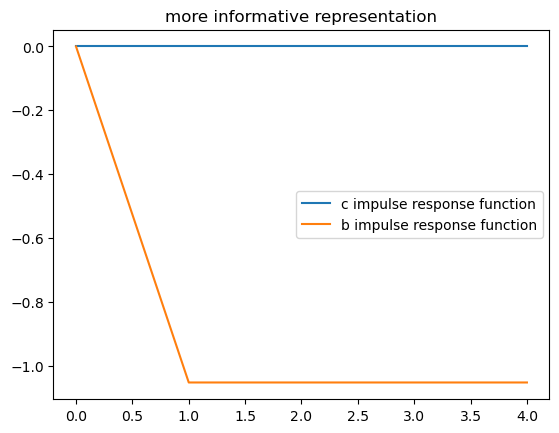

In [11]:
plt.title("more informative representation")
plt.plot(range(J), c_res1 / σϵ, label="c impulse response function")
plt.plot(range(J), b_res1 / σϵ, label="b impulse response function")
plt.legend()

In [12]:
c_res2 / σa, b_res2 / σa

(array([0.0975, 0.0975, 0.0975, 0.0975, 0.0975]),
 array([ 0.  , -0.95, -0.95, -0.95, -0.95]))

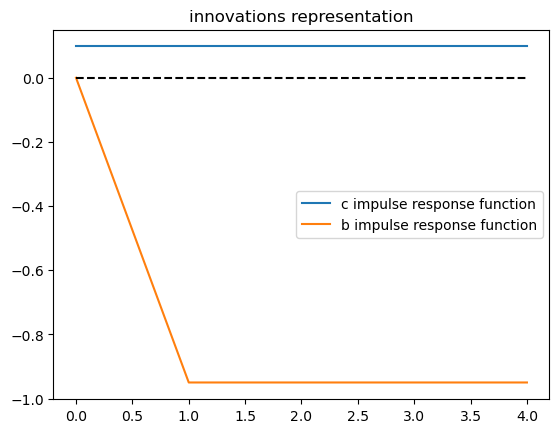

In [13]:
plt.title("innovations representation")
plt.plot(range(J), c_res2 / σa, label="c impulse response function")
plt.plot(range(J), b_res2 / σa, label="b impulse response function")
plt.plot([0, J-1], [0, 0], '--', color='k')
plt.legend()

In [14]:
# Set time length for simulation
T = 100

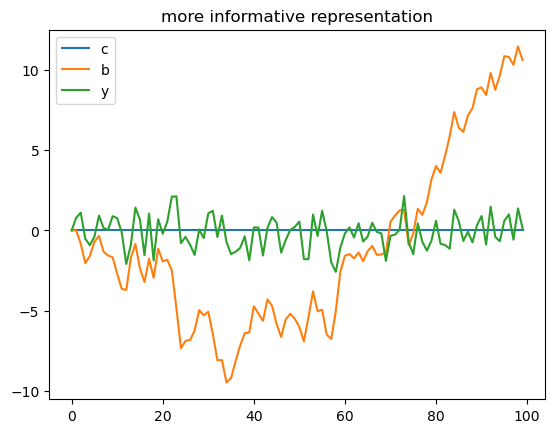

In [15]:
x1, y1 = LSS1.simulate(ts_length=T)
plt.plot(range(T), y1[0, :], label="c")
plt.plot(range(T), x1[2, :], label="b")
plt.plot(range(T), x1[0, :], label="y")
plt.title("more informative representation")
plt.legend()

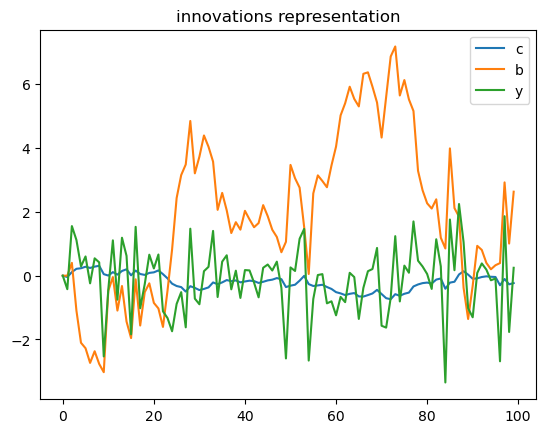

In [16]:
x2, y2 = LSS2.simulate(ts_length=T)
plt.plot(range(T), y2[0, :], label="c")
plt.plot(range(T), x2[2, :], label="b")
plt.plot(range(T), x2[0, :], label="y")
plt.title("innovations representation")
plt.legend()